In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.dates as mdates
from datetime import datetime

In [268]:
lines = []
id = [21, 22,23]
for i in id:
  with open(f"Dane\Learning_data\wind_min_merge_{i}_flow.lst", "r") as file:
    for line in file:
      lines.append(line.split())

In [269]:
df = pd.DataFrame(lines, columns=["Year", "Day", "Hour", "Minute","Field_Magnitude", "Bx", "By", "Bz", "Speed_flow", "Vx", "Vy", "Vz", "Xgse", "Ygse", "Zgse"],
                   dtype =float)
convert_dict = {"Year": int, "Day": int, "Hour": int, "Minute": int}
df = df.astype(convert_dict)

In [270]:
df = df.replace(99999.9, 0)
df = df.replace(9999.99, 0)


In [271]:

label = []
df["Field_Magnitude"] = np.abs(df["Field_Magnitude"])
for data, v	 in zip(df["Field_Magnitude"], df["Speed_flow"]):
    if data > 25 and v > 300:
        label.append(1)
    else:
        label.append(0)

df["label"]  = label

In [272]:
df.describe(include = 'all')

,Year,Day,Hour,Minute,Field_Magnitude,Bx,By,Bz,Speed_flow,Vx,Vy,Vz,Xgse,Ygse,Zgse,label
count,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06,1.582560e+06
mean,2.021002e+03,1.826697e+02,1.150000e+01,2.950000e+01,5.206945e+00,1.040866e-01,-2.502177e-01,-1.409529e-02,3.683724e+02,-3.691850e+02,3.863846e-01,-5.392244e+00,2.174937e+02,1.679489e+00,1.451986e+00,1.415428e-04
std,8.183501e-01,1.057468e+02,6.922189e+00,1.731811e+01,2.668246e+00,3.281291e+00,3.756918e+00,2.969566e+00,1.455704e+02,1.437158e+02,1.926225e+01,1.832564e+01,4.881281e+01,7.186284e+01,7.647265e+00,1.189634e-02
min,2.020000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.744000e+01,-2.466000e+01,-2.449000e+01,0.000000e+00,-9.085000e+02,-1.628000e+02,-1.733000e+02,0.000000e+00,-1.031700e+02,-1.095000e+01,0.000000e+00
25%,2.020000e+03,9.100000e+01,5.750000e+00,1.475000e+01,3.580000e+00,-2.360000e+00,-2.740000e+00,-1.580000e+00,3.238000e+02,-4.515000e+02,-9.900000e+00,-1.550000e+01,2.021400e+02,-6.949000e+01,-5.380000e+00,0.000000e+00
50%,2.021000e+03,1.830000e+02,1.150000e+01,2.950000e+01,4.630000e+00,1.300000e-01,-3.400000e-01,0.000000e+00,3.765000e+02,-3.764000e+02,0.000000e+00,-4.400000e+00,2.210000e+02,0.000000e+00,1.210000e+00,0.000000e+00
75%,2.022000e+03,2.740000e+02,1.725000e+01,4.425000e+01,6.200000e+00,2.580000e+00,2.320000e+00,1.510000e+00,4.518000e+02,-3.239000e+02,8.100000e+00,2.900000e+00,2.476100e+02,7.355000e+01,8.080000e+00,0.000000e+00
max,2.023000e+03,3.660000e+02,2.300000e+01,5.900000e+01,3.107000e+01,1.894000e+01,2.359000e+01,2.719000e+01,9.087000e+02,0.000000e+00,2.481000e+02,1.799000e+02,2.659900e+02,1.047800e+02,1.359000e+01,1.000000e+00


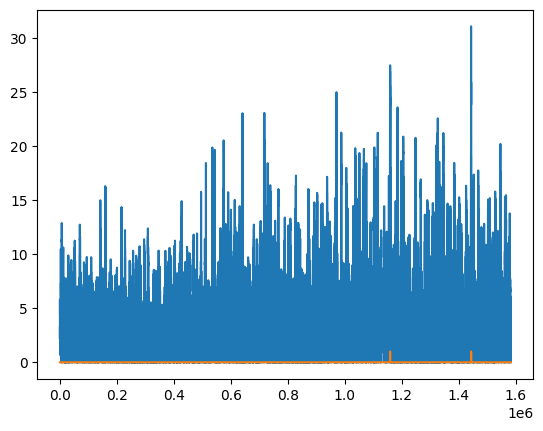

In [273]:
plt.figure(1)
plt.plot(df["Field_Magnitude"])
plt.plot(df["label"])

plt.show()


In [274]:
arg_max = np.argwhere(df["label"])

In [275]:
field_magnitude = np.array(df["Field_Magnitude"])
speed_flow = np.array(df["Speed_flow"])
vz = np.array(df["Vx"])



In [276]:
df.head()

,Year,Day,Hour,Minute,Field_Magnitude,Bx,By,Bz,Speed_flow,Vx,Vy,Vz,Xgse,Ygse,Zgse,label
0,2020,1,0,0,3.19,2.50,1.97,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2020,1,0,1,3.13,2.57,1.78,-0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
2,2020,1,0,2,3.07,2.61,1.62,-0.04,297.8,-297.4,15.3,-6.2,0.0,0.0,0.00,0
3,2020,1,0,3,2.93,2.52,1.49,0.07,297.8,-297.4,15.2,-6.2,0.0,0.0,0.00,0
4,2020,1,0,4,3.01,2.57,1.55,-0.03,297.8,-297.4,13.5,-7.5,217.9,101.6,-5.08,0


In [277]:
df['DayHour'] = df['Year'].astype(str) +"-" +df['Day'].astype(str) + '  ' + df['Hour'].astype(str) + ":" + df['Minute'].astype(str)
day_hour = np.array(df["DayHour"])


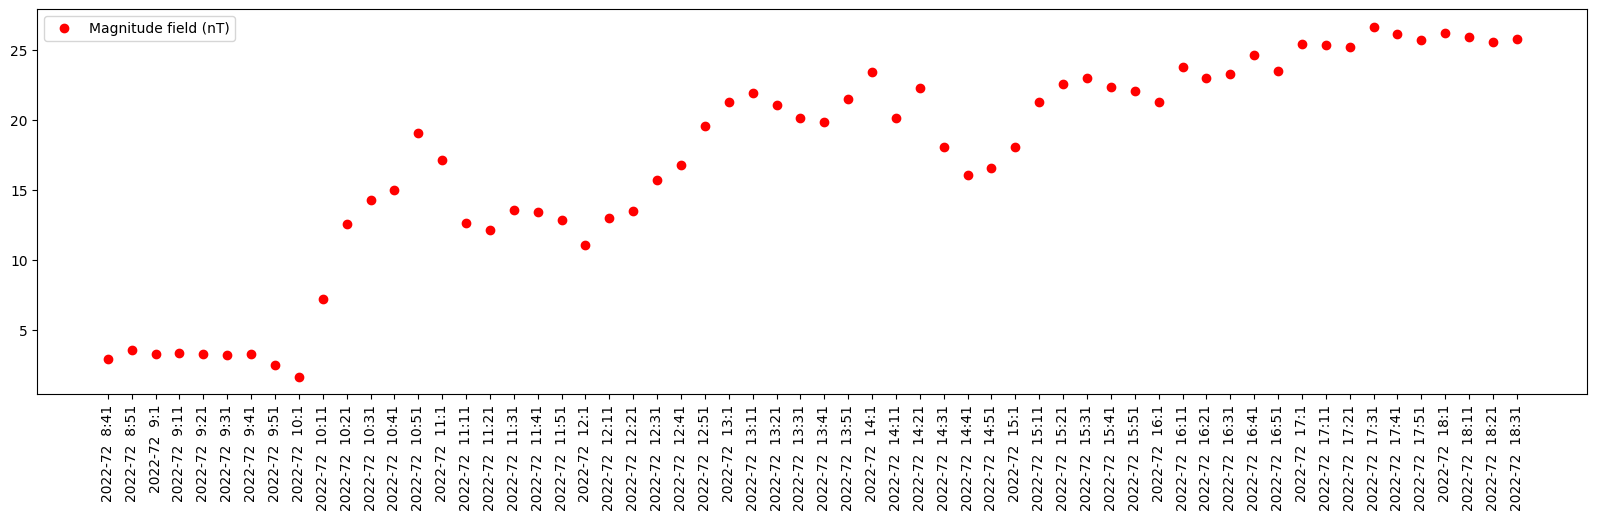

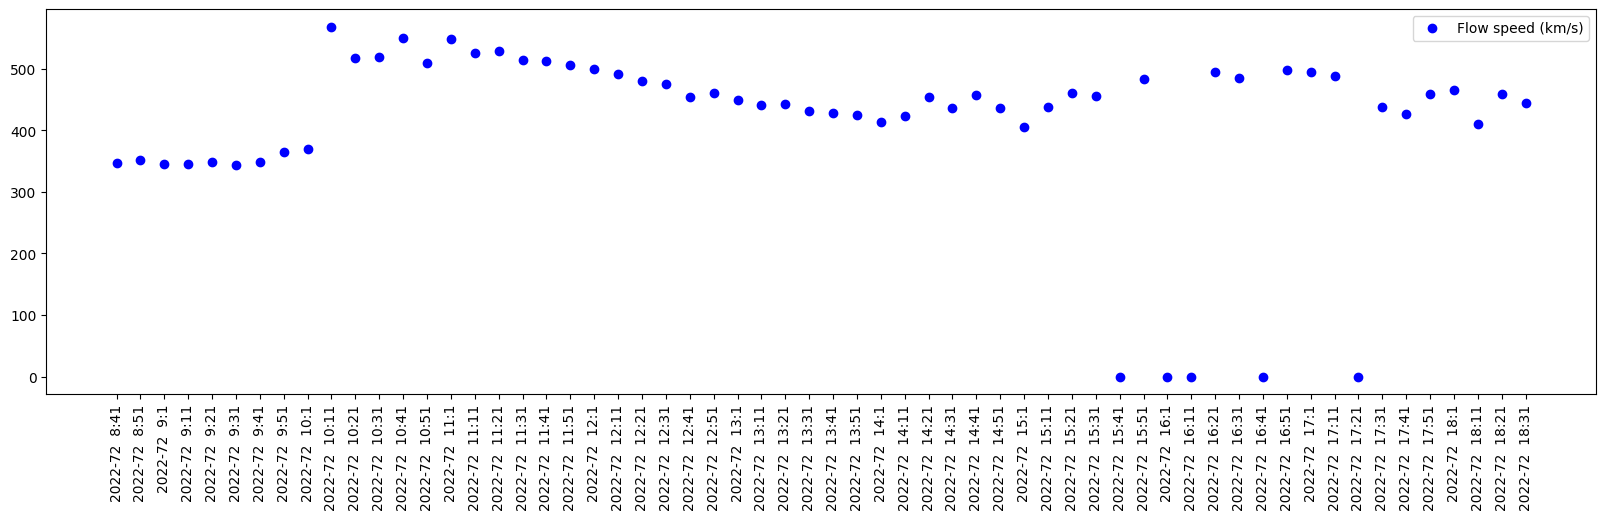

In [286]:
i =0
# field_magnitude_sliced = field_magnitude[158875-20:158875+20]
plt.figure(figsize=(20, 5))
plt.plot(df['DayHour'][arg_max[i][0]-500:arg_max[i][0]+100][::10],field_magnitude[arg_max[i][0]-500:arg_max[i][0]+100][::10], "ro")
# plt.legend("field_magnitude")
plt.legend(['Magnitude field (nT)'])
plt.xticks(rotation=90) 
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(df['DayHour'][arg_max[i][0]-500:arg_max[i][0]+100][::10],speed_flow[arg_max[i][0]-500:arg_max[i][0]+100][::10], "bo")
plt.legend(['Flow speed (km/s)'])
plt.xticks(rotation=90) 
plt.show()



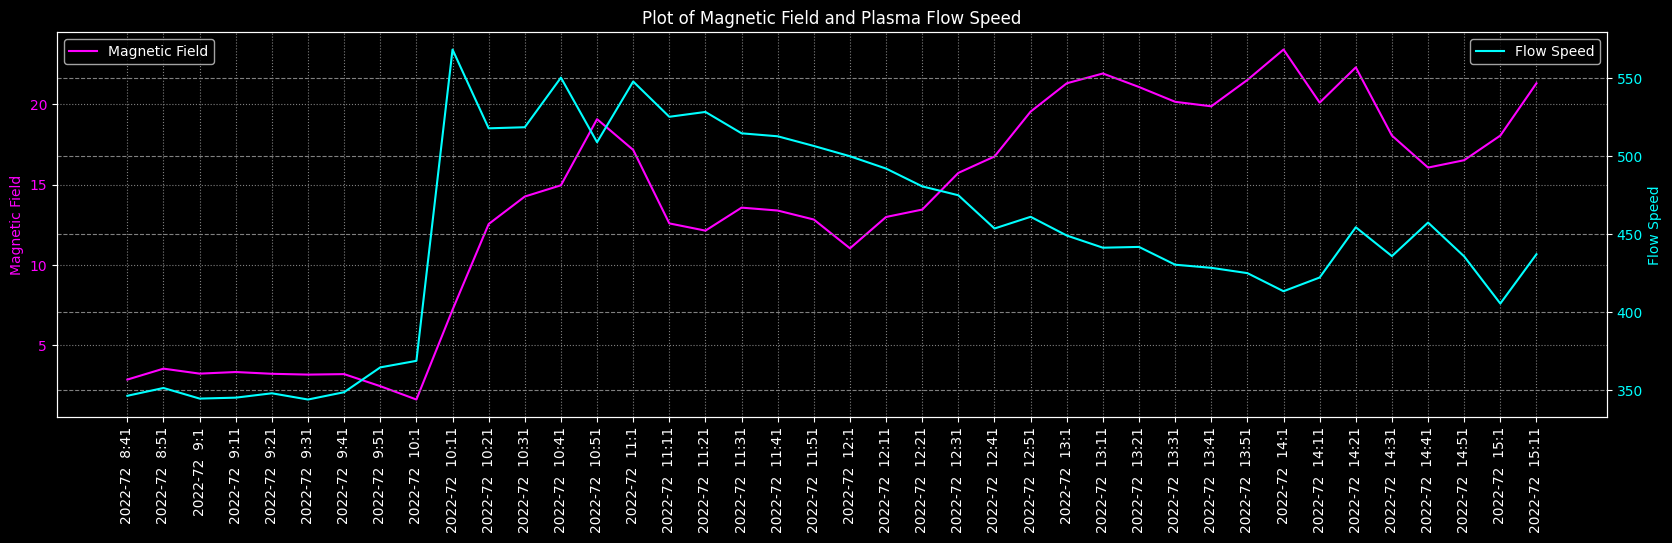

In [318]:
fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(df['DayHour'][arg_max[i][0]-500:arg_max[i][0]-100][::10], field_magnitude[arg_max[i][0]-500:arg_max[i][0]-100][::10], color='magenta', label='Magnetic Field')
ax1.set_ylabel('Magnetic Field', color='magenta')

ax1.tick_params(axis='y', labelcolor='magenta')
ax1.tick_params(axis='x', rotation=90)
ax2 = ax1.twinx()

ax2.plot(df['DayHour'][arg_max[i][0]-500:arg_max[i][0]-100][::10], speed_flow[arg_max[i][0]-500:arg_max[i][0]-100][::10], color='cyan', label='Flow Speed')
ax2.set_ylabel('Flow Speed', color='cyan')
ax2.tick_params(axis='y', labelcolor='cyan')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.grid(linestyle='dotted', color='gray')
ax2.grid(linestyle='--', color='gray')

ax2.spines['right'].set_color('white')
ax2.spines['top'].set_color('white')
plt.style.use('dark_background')

plt.title('Plot of Magnetic Field and Plasma Flow Speed')
plt.show()